# GAM Example with Wage data
Irving Gomez Mendez

In [1]:
from pygam import LinearGAM, s, f #l, te, intercept

#y∼ExponentialFamily(μ|X)
#g(μ|X)=β0+f1(X1)+f2(X2,X3)+…+fM(XN)

#GAM (base class for constructing custom models)
#LinearGAM
#LogisticGAM
#GammaGAM
#PoissonGAM
#InvGaussGAM
#ExpectileGAM

#GAM(distribution='...')
#'normal'
#'binomial'
#'poisson'
#'gamma'
#'inv_gauss'

#GAM(link='...')
#'identity'
#'logit'
#'inverse'
#'log'
#'inverse-squared'

In [2]:
from pygam.datasets import wage
import matplotlib.pyplot as plt

In [3]:
X, y = wage(return_X_y=True)

In [4]:
X

array([[2.006e+03, 1.800e+01, 0.000e+00],
       [2.004e+03, 2.400e+01, 3.000e+00],
       [2.003e+03, 4.500e+01, 2.000e+00],
       ...,
       [2.005e+03, 2.700e+01, 0.000e+00],
       [2.005e+03, 2.700e+01, 2.000e+00],
       [2.009e+03, 5.500e+01, 1.000e+00]])

In [5]:
## model
gam1 = LinearGAM(s(0) + s(1) + f(2), fit_intercept = False)
gam1.gridsearch(X, y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:01
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:02 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:02 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=False, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2), tol=0.0001, 
   verbose=False)

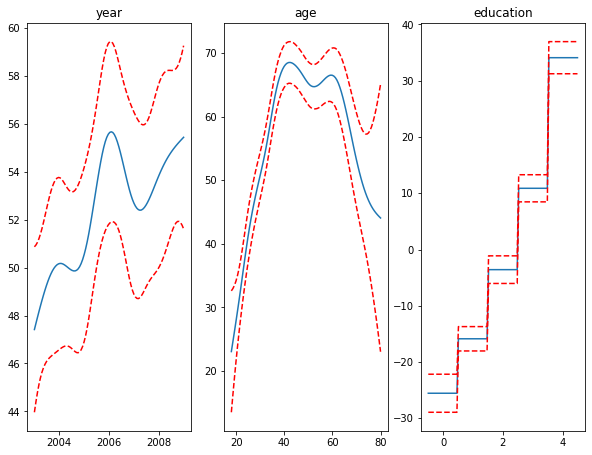

In [6]:
## plotting
#plt.figure(figsize=(10,7.5))
fig, axs = plt.subplots(1,3, figsize=(10,7.5))
titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
#plt.rcParams['figure.figsize'] = [10, 7.5]

In [7]:
XX = [[2022, 23, 3]]
print(gam1.predict(XX))
for i in range(3):
    print(gam1.partial_dependence(term = i, X=XX))


[116.40875844]
[69.50790236]
[36.0181647]
[10.88269138]


In [8]:
## model
gam2 = LinearGAM(s(0, constraints='monotonic_inc') + s(1, constraints='concave') + f(2), fit_intercept = False)
gam2.gridsearch(X, y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:08
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:04
 27% (3 of 11) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:04
 36% (4 of 11) |#########                | Elapsed Time: 0:00:02 ETA:   0:00:03
 45% (5 of 11) |###########              | Elapsed Time: 0:00:02 ETA:   0:00:02
 54% (6 of 11) |#############            | Elapsed Time: 0:00:03 ETA:   0:00:02
 63% (7 of 11) |###############          | Elapsed Time: 0:00:03 ETA:   0:00:01
 72% (8 of 11) |##################       | Elapsed Time: 0:00:03 ETA:   0:00:01
 81% (9 of 11) |####################     | Elapsed Time: 0:00:04 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:04 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:05 Time:  0:00:05


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=False, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2), tol=0.0001, 
   verbose=False)

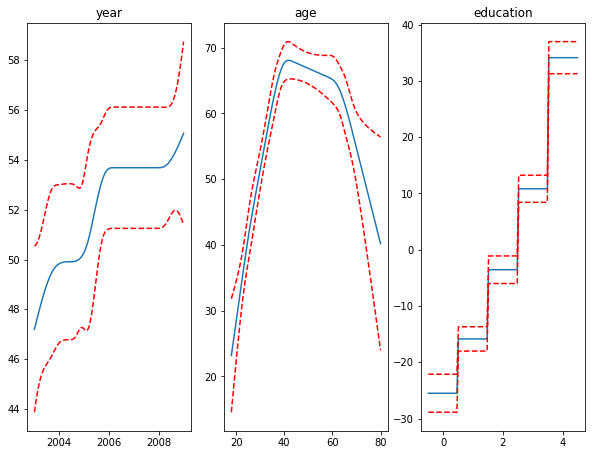

In [9]:
## plotting
fig, axs = plt.subplots(1,3, figsize=(10,7.5))
titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
#plt.savefig('GAMS.png')

In [10]:
XX = [[2020, 28, 4]]
print(gam2.predict(XX))
for i in range(3):
    print(gam2.partial_dependence(term = i, X=XX))

[163.12842779]
[81.46747746]
[47.52740068]
[34.13354965]


In [11]:
gam3 = LinearGAM(s(0) + s(1, constraints = 'concave') + f(2), fit_intercept = False)
gam3.gridsearch(X, y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:06
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:04
 27% (3 of 11) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:02
 36% (4 of 11) |#########                | Elapsed Time: 0:00:01 ETA:   0:00:02
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:01
 72% (8 of 11) |##################       | Elapsed Time: 0:00:02 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:02 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:03 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=False, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2), tol=0.0001, 
   verbose=False)

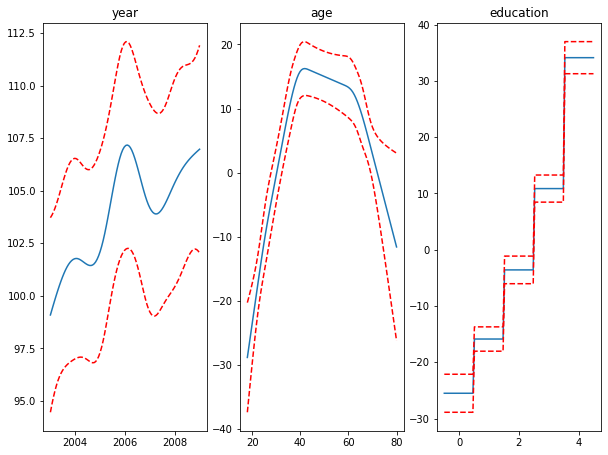

In [12]:
## plotting
fig, axs = plt.subplots(1,3, figsize=(10,7.5))
titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam3.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam3.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam3.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])